In [1428]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sb
import math

In [1429]:
df = pd.read_csv('dataset1.csv')

In [1430]:
df.head()

,id,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [1431]:
print(df.Gender.unique())
print(df.EthnicGroup.unique())
print(df.ParentEduc.unique())
print(df.TestPrep.unique())
print(df.ParentMaritalStatus.unique())
print(df.PracticeSport.unique())
print(df.IsFirstChild.unique())
print(df.WklyStudyHours.unique())


['female' 'male']
[nan 'group C' 'group B' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
['none' nan 'completed']
['married' 'single' 'widowed' nan 'divorced']
['regularly' 'sometimes' 'never' nan]
['yes' 'no' nan]
['< 5' '5 - 10' '> 10' nan]


In [1432]:
df.drop(['id'], axis='columns', inplace=True)
df.drop(['TransportMeans','LunchType'], axis='columns', inplace=True)

In [1433]:
df

,Gender,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,none,married,regularly,yes,3.0,< 5,71,71,74
1,female,group C,some college,NaN,married,sometimes,yes,0.0,5 - 10,69,90,88
2,female,group B,master's degree,none,single,sometimes,yes,4.0,< 5,87,93,91
3,male,group A,associate's degree,none,married,never,no,1.0,5 - 10,45,56,42
4,male,group C,some college,none,married,sometimes,yes,0.0,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,none,single,sometimes,no,2.0,5 - 10,59,61,65
30637,male,group E,high school,none,single,regularly,no,1.0,5 - 10,58,53,51
30638,female,NaN,high school,completed,married,sometimes,no,1.0,5 - 10,61,70,67
30639,female,group D,associate's degree,completed,married,regularly,no,3.0,5 - 10,82,90,93


In [1434]:
df.Gender = df.Gender.map({'female':0,'male':1})
df.EthnicGroup = df.EthnicGroup.map({'group C':0, 'group B':1, 'group A':2, 'group D':3, 'group E':4})
df.ParentEduc = df.ParentEduc.map({"bachelor's degree":0, 'some college':1, "master's degree":2, "associate's degree":3,'high school':4, 'some high school':5})
df.TestPrep = df.TestPrep.map({'none':0, 'completed':1})
df.ParentMaritalStatus = df.ParentMaritalStatus.map({'married':0, 'single':1, 'widowed':2, 'divorced':3})
df.PracticeSport = df.PracticeSport.map({'regularly':0, 'sometimes':1, 'never':2})
df.IsFirstChild =df.IsFirstChild.map({'yes':0, 'no':1})
df.WklyStudyHours = df.WklyStudyHours.map({'< 5':0, '5 - 10':1, '> 10':2})

In [1435]:
df

,Gender,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,0.0,71,71,74
1,0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,1.0,69,90,88
2,0,1.0,2.0,0.0,1.0,1.0,0.0,4.0,0.0,87,93,91
3,1,2.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,45,56,42
4,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,3.0,4.0,0.0,1.0,1.0,1.0,2.0,1.0,59,61,65
30637,1,4.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,58,53,51
30638,0,NaN,4.0,1.0,0.0,1.0,1.0,1.0,1.0,61,70,67
30639,0,3.0,3.0,1.0,0.0,0.0,1.0,3.0,1.0,82,90,93


In [1436]:
df.describe()

,Gender,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
count,30641.000000,28801.000000,28796.000000,28811.000000,29451.000000,30010.000000,29737.000000,29069.000000,29686.000000,30641.000000,30641.000000,30641.000000
mean,0.496622,1.699142,2.696972,0.345528,0.782181,0.773775,0.358308,2.145894,0.897730,66.558402,69.377533,68.418622
std,0.499997,1.487612,1.709394,0.475548,1.101222,0.664760,0.479511,1.458242,0.665052,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,56.000000,59.000000,58.000000
50%,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,67.000000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,78.000000,80.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,7.000000,2.000000,100.000000,100.000000,100.000000


In [1437]:
df.EthnicGroup = df.EthnicGroup.fillna(math.ceil(df.EthnicGroup.mean()))
df.ParentEduc = df.ParentEduc.fillna(math.ceil(df.ParentEduc.mean()))
df.TestPrep = df.TestPrep.fillna(math.ceil(df.TestPrep.mean()))
df.ParentMaritalStatus = df.ParentMaritalStatus.fillna(math.ceil(df.ParentMaritalStatus.mean()))
df.PracticeSport = df.PracticeSport.fillna(math.ceil(df.PracticeSport.mean()))
df.IsFirstChild =df.IsFirstChild.fillna(math.ceil(df.IsFirstChild.mean()))
df.NrSiblings = df.NrSiblings.fillna(math.ceil(df.NrSiblings.mean()))
df.WklyStudyHours = df.WklyStudyHours.fillna(math.ceil(df.WklyStudyHours.mean()))

In [1438]:
df

,Gender,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,71,71,74
1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,69,90,88
2,0,1.0,2.0,0.0,1.0,1.0,0.0,4.0,0.0,87,93,91
3,1,2.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,45,56,42
4,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,3.0,4.0,0.0,1.0,1.0,1.0,2.0,1.0,59,61,65
30637,1,4.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,58,53,51
30638,0,2.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,61,70,67
30639,0,3.0,3.0,1.0,0.0,0.0,1.0,3.0,1.0,82,90,93


In [1439]:
df.describe()

,Gender,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000
mean,0.496622,1.717209,2.715218,0.384615,0.790640,0.778434,0.377240,2.189713,0.900917,66.558402,69.377533,68.418622
std,0.499997,1.444023,1.658696,0.486512,1.080445,0.658664,0.484704,1.432787,0.654847,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,56.000000,59.000000,58.000000
50%,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,67.000000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,78.000000,80.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,7.000000,2.000000,100.000000,100.000000,100.000000


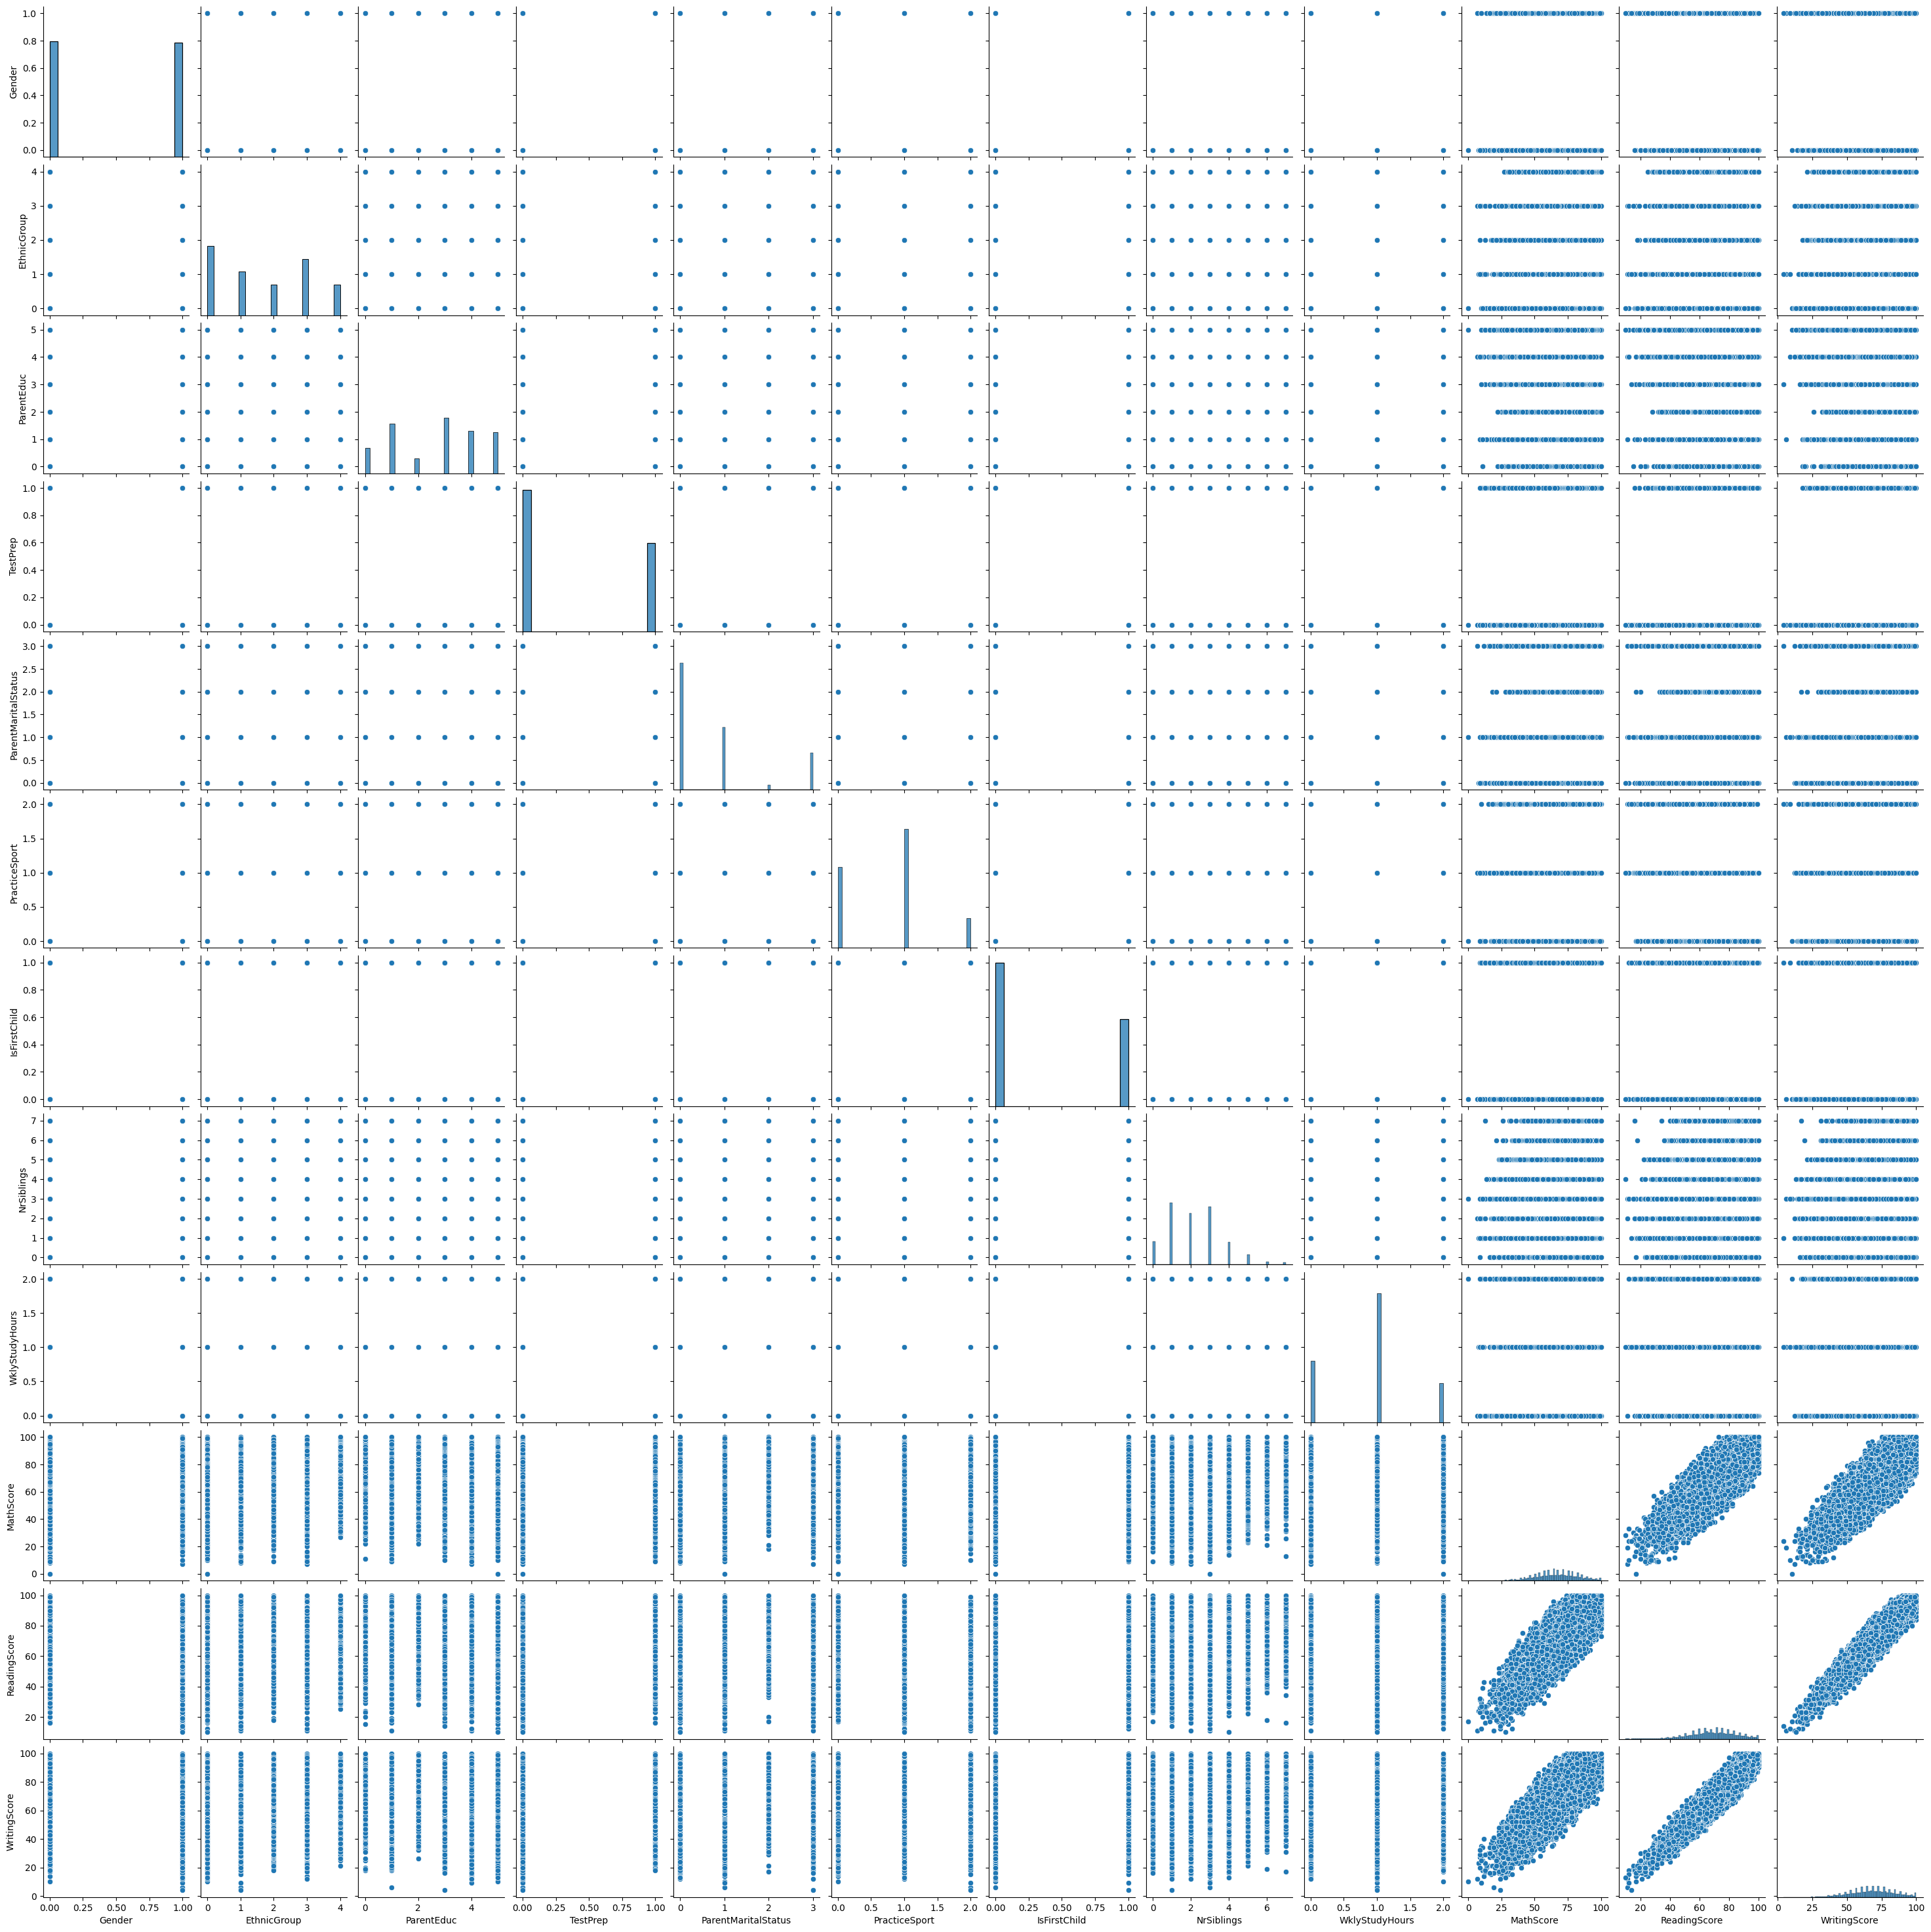

In [1440]:
sb.pairplot(df)

In [1441]:
k_neighbors = neighbors.KNeighborsClassifier()

In [1442]:
#Predecimos el genero
#Gender	EthnicGroup	ParentEduc	TestPrep	ParentMaritalStatus	PracticeSport	IsFirstChild	NrSiblings	WklyStudyHours	MathScore	ReadingScore	WritingScore
#	                                                            PracticeSport	                         	WklyStudyHours	MathScore	ReadingScore	WritingScore

data_x = df.drop(['Gender','EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'IsFirstChild', 'NrSiblings'],axis='columns')
data_y = df.Gender

In [1443]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1)

In [1444]:
k_neighbors.fit(train_x,train_y)

KNeighborsClassifier()

In [1445]:
print(f'Score: {round(k_neighbors.score(test_x, test_y), 4) * 100}%')

Score: 83.56%


In [1596]:
#Aplicar el modelo
#inputs              PracticeSport WklyStudyHours	MathScore	ReadingScore	WritingScore
#df.PracticeSport = df.PracticeSport.map({'regularly':0, 'sometimes':1, 'never':2}
#df.WklyStudyHours = df.WklyStudyHours.map({'< 5':0, '5 - 10':1, '> 10':2})
lb_ps = {0:'regular', 1:'aveces', 2:'nunca'}
lb_wsh = {0:'menos de 5', 1:'entre 5 - 10', 2:'mas de 10'}
lb_sex = {0:'femenino', 1:'masculino'}

pract_sp = 2
stud_hour = 2
math_sc = 60
read_sc = 77
writ_sc = 78

predicted = k_neighbors.predict([[pract_sp, stud_hour,math_sc, read_sc, writ_sc]])

print(f'El estudiante que {lb_ps[pract_sp]} practica deporte, estudia {lb_wsh[stud_hour]} horas a la semana, saco en matematicas {math_sc},'+
       f'en lectura {read_sc} y escritura {writ_sc} es de sexo {lb_sex[predicted[0]]}')


El estudiante que nunca practica deporte, estudia mas de 10 horas a la semana, saco en matematicas 60,en lectura 77 y escritura 78 es de sexo femenino


c:\Users\75890424\Desktop\Clasificar\evn-clasf\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
